In [4]:
import numpy as np

In [5]:
x = var("x")

In [6]:
f(x) = 1/(3*x**2 +4*x + 2)
X0 = -2
X1 = 2
h1 = 1.0
h2 = 0.5

### Заданная функция:

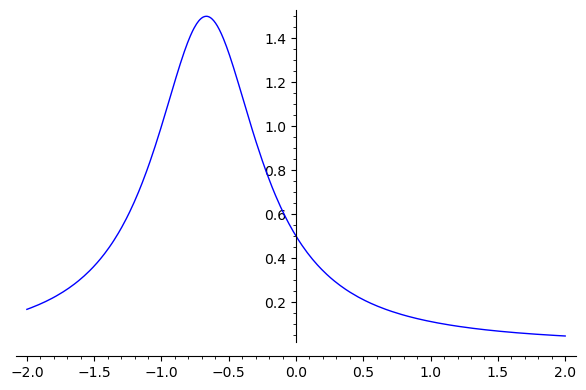

In [7]:
plot(f,xmin = X0,xmax = X1)

#### Отдельные функции для каждого метода интегрирования

In [1]:
def integrate_rect(func,xmin,xmax,h,trace = False): #сделать trace
    if(h <= 0): #чтоб не упал в бесконечный цикл
        return false
    #step = (xmax - xmin)/n
    step = h
    xcur = xmin
    res = 0
    
    traceplt = 0
    
    if(h < 0.01):#если шаг очень мал, то трэйсить не надо
        trace = False
        
    if(trace):
        traceplt = plot(func,xmin = xmin, xmax = xmax)
    
    while (xcur + step < xmax):
        if(trace):
            fi = func(xcur + step/2)
            traceplt += line([(xcur + step/2,0),(xcur + step/2,fi)],color = "red")
            traceplt += line([(xcur, fi),(xcur + step, fi)],color = "red")
        
        res += func(xcur + step/2)
        xcur += step
    res*=step
    if(trace):
        show(traceplt)
    return res.n()

In [2]:
def integrate_trap(func,xmin,xmax,h): #сделать trace
    #step = (xmax - xmin)/n
    step = h
    xcur = xmin
    res = 0
    while (xcur + step < xmax):
        res += func(xcur) + func(xcur + step)
        xcur += step
    res *= step/2
    return res.n()

In [4]:
def integrate_simpson(func,xmin,xmax,h,trace = false): #сделать trace
    step = h
    xcur = xmin
    
    traceplt = 0
    
    if(h < 0.1):
        trace = false
        
    if(trace):
        traceplt = plot(func,xmin = X1, xmax = X2)
    
    
    res = 0
    while (xcur + 2*step < xmax):
        
        res += func(xcur) + 4*func(xcur + step) + func(xcur + 2*step)
        xcur += step*2
    res *= step/3
    return res.n()

### Универсальная функция

In [8]:
def plot_sq_int(pts):
    if(len(pts) != 3):
        return false
    a = var("a0,a1,a2")
    fx = a[0]*x**2 + a[1]*x**1 + a[2] 
    sols = solve([fx(x = pts[0][0]) == pts[0][1], fx(x = pts[1][0]) == pts[1][1],fx(x = pts[2][0]) == pts[2][1]],a)
    A = []
    for k in sols[0]:
        A.append(k.rhs())
    func = A[0]*x**2 + A[1]*x + A[2]
    return plot(func,xmin = pts[0][0],xmax = pts[2][0],color = "red")


def integrate(func,xmin,xmax,h,method,trace = false,eps = 0.1):
    if(h <= 0): #чтоб не упал в бесконечный цикл
        return false
    
    step = h
    xcur = xmin
    res = 0
    
    traceplt = 0
    
    if(h < 0.01):#если шаг очень мал, то трэйсить не надо
        trace = False
        
    if(trace):
        traceplt = plot(func,xmin = xmin, xmax = xmax)
        
        
        
    if(method == "simpson"):
        while (xcur + 2*step <= xmax + h*eps):
            if(trace):
                fi1 = func(xcur)
                fi2 = func(xcur + step)
                fi3 = func(xcur + 2*step)
                
                traceplt += line([(xcur,0),(xcur,fi1)],color = "red")
                traceplt += line([(xcur + step,0),(xcur + step,fi2)],color = "red")
                traceplt += line([(xcur + 2*step,0),(xcur + 2*step,fi3)],color = "red")
                
                traceplt += plot_sq_int([(xcur,fi1),(xcur + step,fi2),(xcur + 2*step,fi3)])
            res += func(xcur) + 4*func(xcur + step) + func(xcur + 2*step)
            xcur += step*2
        res *= step/3
    else:
        if(method == "trap"):
            while (xcur + step <= xmax + h*eps):
                if(trace):
                    fi1 = func(xcur)
                    fi2 = func(xcur + step)
                    traceplt += line([(xcur,0),(xcur,fi1)],color = "red")
                    traceplt += line([(xcur + step,0),(xcur + step,fi2)],color = "red")
                    traceplt += line([(xcur, fi1),(xcur + step, fi2)],color = "red")

                res += func(xcur) + func(xcur + step)
                xcur += step
            res *= step/2
        else:
            if(method == "rect"):
                while (xcur + step <= xmax + h*eps):
                    if(trace):
                        fi = func(xcur + step/2)
                        traceplt += line([(xcur + step/2,0),(xcur + step/2,fi)],color = "red")
                        traceplt += line([(xcur, fi),(xcur + step, fi)],color = "red")
                    
                    res += func(xcur + step/2)
                    xcur += step
                res*=step
            else:
                print("ERROR: wrong method")
                return false
    if(trace):
        show(traceplt)
    return res.n()

### Примеры работы :

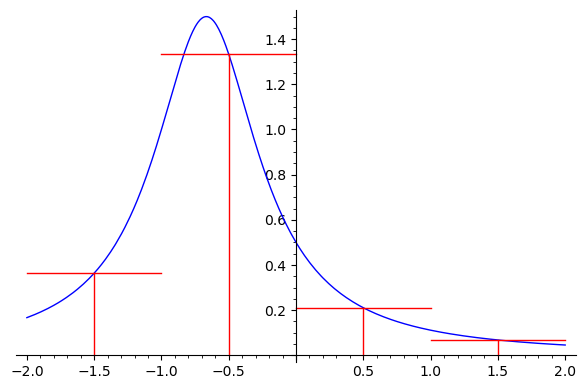

'Значение интеграла: 1.97529262292866'

In [14]:
show("Значение интеграла: {}".format(integrate(f,X0,X1,h1,"rect",trace = True)))

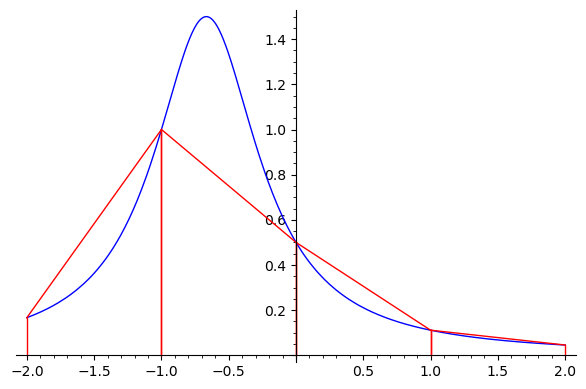

'Значение интеграла: 1.71717171717172'

In [15]:
show("Значение интеграла: {}".format(integrate(f,X0,X1,h1,"trap",trace = True)))

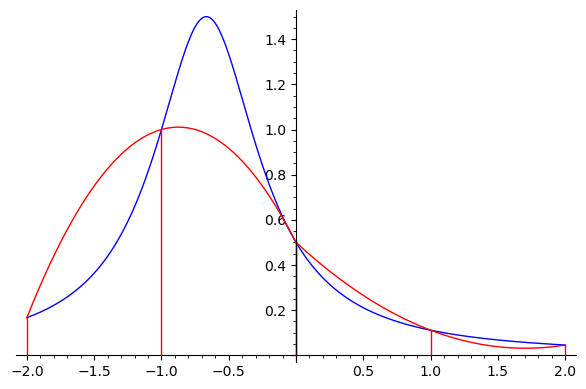

'Значение интеграла: 1.88552188552189'

In [16]:
show("Значение интеграла: {}".format(integrate(f,X0,X1,h1,"simpson",trace = True)))

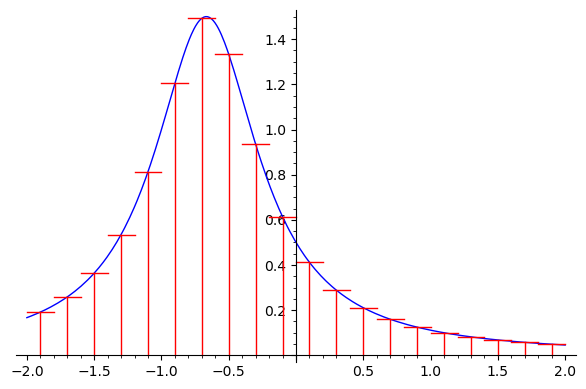

1.85784288038678

In [9]:
integrate(f,X0,X1,0.2,"rect",trace = True)

In [17]:
def runge_romberg_error(f,xmin,xmax,h,k,method): #счет ошибки методом Рунге-Ромберга
    r1 = integrate(f,X0,X1,h,method)
    r2 = integrate(f,X0,X1,h*k,method)
    
    a = 1
    if method == "simpson":
        a = 2
    
    err = (r1 - r2)/(k**a - 1)
    
    return err

In [14]:
runge_rumbert_error(f,X0,X1,0.2,0.001,"simpson")

-0.000440350744507090

In [15]:
#аналитически посчитанный интеграл
integral(f,x,X0,X1).n(digits = 50)

1.8574186872187474639041694307937306678634682385043

In [16]:
#проверка, корректности ошибки
integrate(f,X0,X1,0.2,"simpson") + runge_romberg_error(f,X0,X1,0.2,0.001,"simpson")

1.85741868677851

In [17]:
integrate(f,X0,X1,0.2,"simpson")

1.85785903752302

In [19]:
h = 0.5

'Метод прямоугольников'

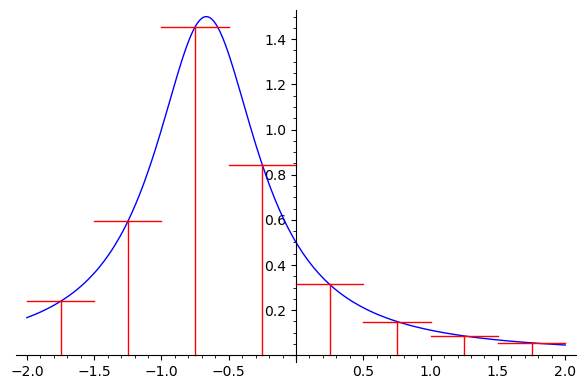

'Результат: 1.86592589805863\n\t Шаг интегрирования: 0.50\n\t Ошибка (Рунге Ромберг | 0.005): 0.00854989382987702\n\t Ошибка (Истинная) 0.00850721083988581'

'Метод трапеций'

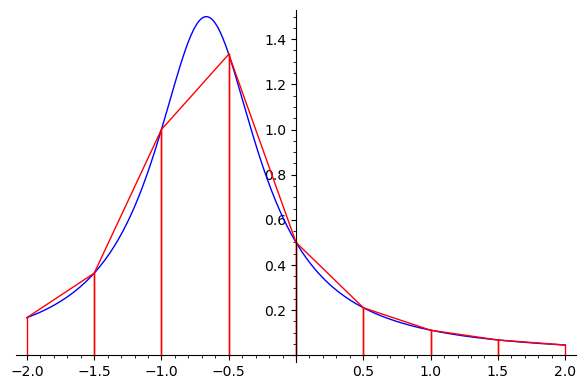

'Результат: 1.84623217005019\n\t Шаг интегрирования: 0.50\n\t Ошибка (Рунге Ромберг | 0.005): 0.0112425971962512\n\t Ошибка (Истинная) 0.0111865171685579'

'Метод Симпсона'

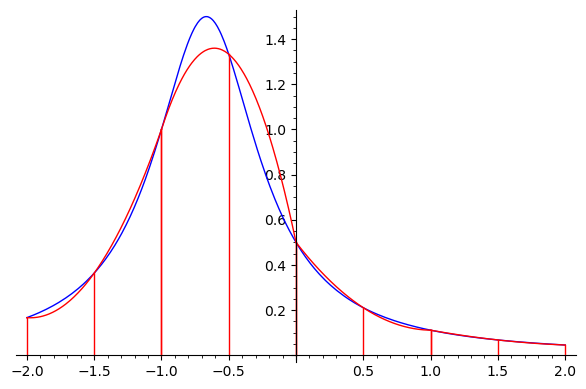

'Результат: 1.88925232100968\n\t Шаг интегрирования: 0.50\n\t Ошибка (Рунге Ромберг | 0.005): 0.0318344296519042\n\t Ошибка (Истинная) 0.0318336337909328'

In [20]:
show("Метод прямоугольников")
show("Результат: {}\n\t Шаг интегрирования: {}\n\t Ошибка (Рунге Ромберг | 0.005): {}\n\t Ошибка (Истинная) {}".
     format(integrate(f,X0,X1,h,"rect",trace = True),
            h.n(digits = 2),
            abs(runge_romberg_error(f,X0,X1,h,0.005,"rect")),
            abs(integrate(f,X0,X1,h,"rect") - integral(f,x,X0,X1).n(digits = 50))))
print("\n\n\n")

show("Метод трапеций")
show("Результат: {}\n\t Шаг интегрирования: {}\n\t Ошибка (Рунге Ромберг | 0.005): {}\n\t Ошибка (Истинная) {}".
     format(integrate(f,X0,X1,h,"trap",trace = True),
            h.n(digits = 2),
            abs(runge_romberg_error(f,X0,X1,h,0.005,"trap")),
            abs(integrate(f,X0,X1,h,"trap") - integral(f,x,X0,X1).n(digits = 50))))
print("\n\n\n")

show("Метод Симпсона")
show("Результат: {}\n\t Шаг интегрирования: {}\n\t Ошибка (Рунге Ромберг | 0.005): {}\n\t Ошибка (Истинная) {}".
     format(integrate(f,X0,X1,h,"simpson",trace = True),
            h.n(digits = 2),
            abs(runge_romberg_error(f,X0,X1,h,0.005,"simpson")),
            abs(integrate(f,X0,X1,h,"simpson") - integral(f,x,X0,X1).n(digits = 50))))